In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

In [2]:
config_paths = {
    "luna16":"../../luna16/LUNA16/",
    "segment":"../../luna16/seg-lungs-LUNA16/",
    "annotations":"../../luna16/annotations.csv",
    "candidates":"../../luna16/candidates.csv",
    "slide_v1":"../center-coord-chunk",
    "slide_v2":"../center-coord-chunk-v2",
}

annotation = pd.read_csv(config_paths['annotations'])


### Phân tích các thông số trong các CT scan.

In [3]:
paths = glob.glob(config_paths["luna16"] + "*/*.mhd")
uids = [path.split("\\")[-1][:-4] for path in paths]


print(len(paths))
print(len(uids))

888
888


In [4]:
from dsets import Ct

test = Ct(uids[0])

In [5]:
# most direction
most_direction = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

In [6]:
# # kiểm tra thông số direction
# uid_diff = []

# for uid in uids:
#     load = Ct(uid)
#     if not np.array_equal(most_direction, load.direction_a) and uid in annotation["seriesuid"].values:
#         uid_diff.append(uid)
#         print(uid, load.direction_a.reshape(9,))

In [7]:
uid_1 = "1.3.6.1.4.1.14519.5.2.1.6279.6001.128023902651233986592378348912"
uid_2 = "1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311"


In [8]:
import SimpleITK as sitk
from util import xyz2irc, plot_ct

In [9]:
annotation[annotation["seriesuid"] == uid_1][["coordX", "coordY", "coordZ"]].values.reshape(3,)


array([  33.83282599,   88.41158995, -101.7804814 ])

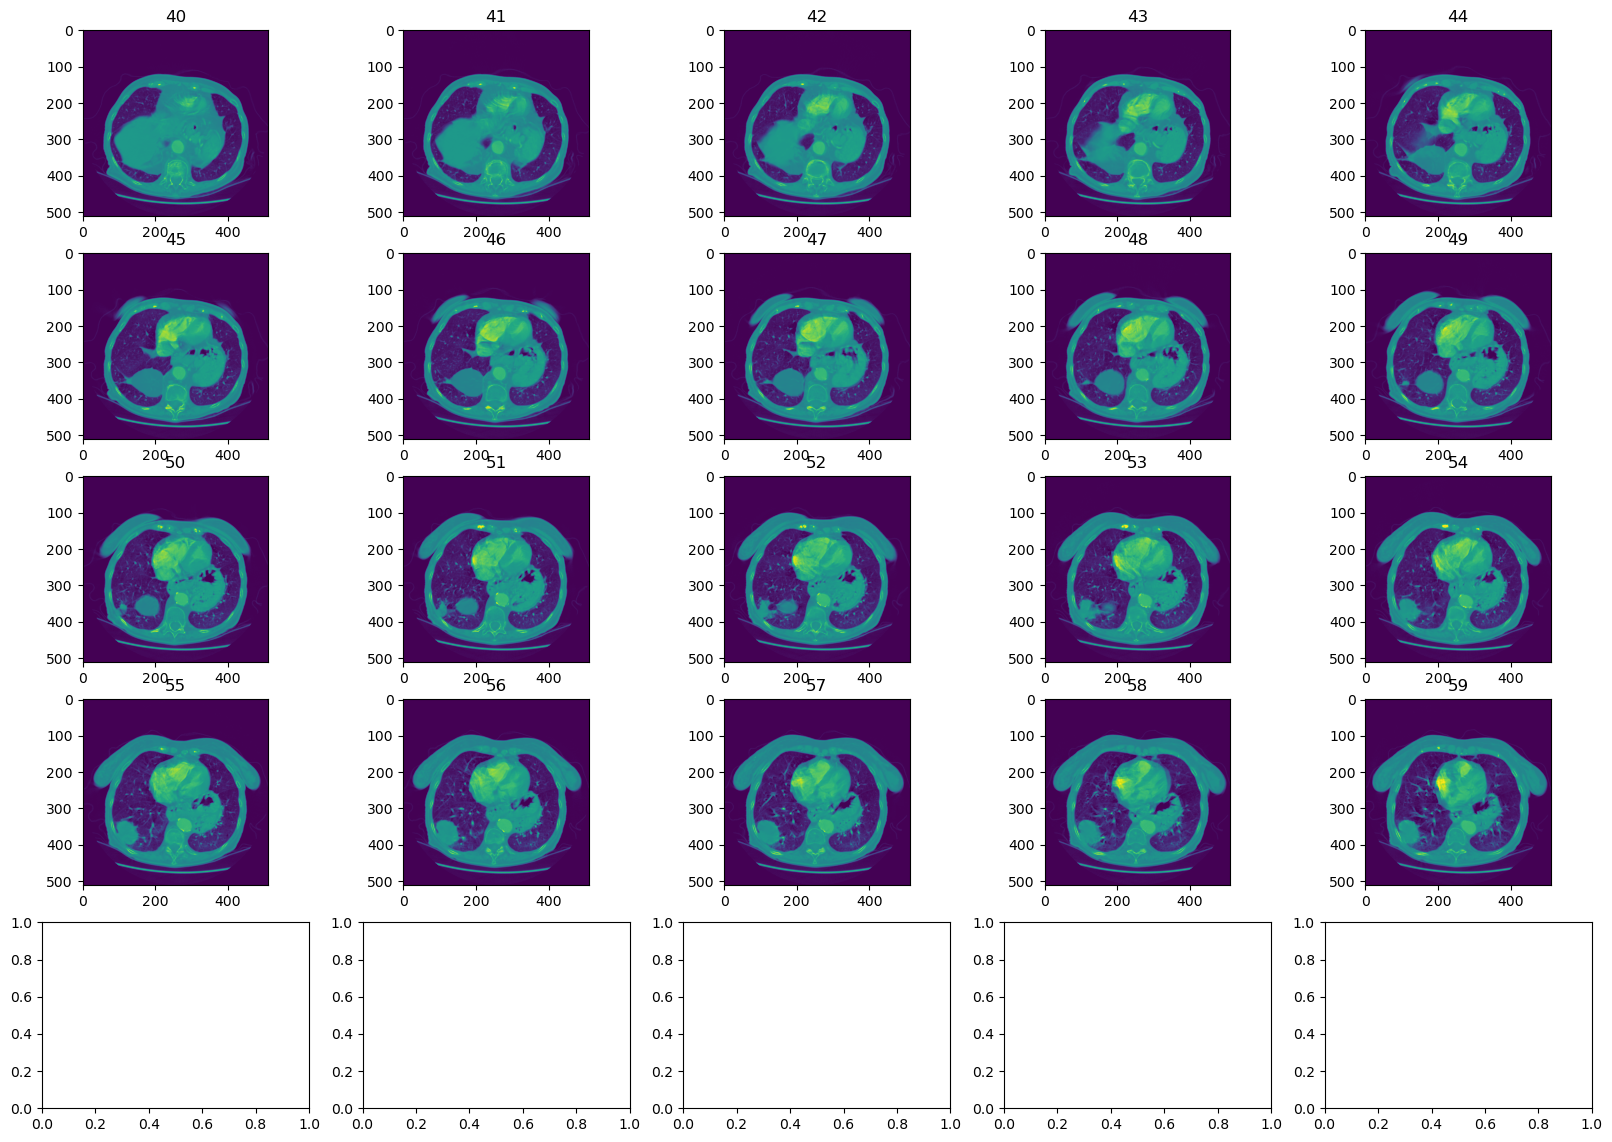

In [10]:
## plot direction {1 0 0 0 1 0 0 0 1}
# test_path = paths[0]
test_uid = uid_1

load = Ct(test_uid)

center_xyz = annotation[annotation["seriesuid"] == uid_1][["coordX", "coordY", "coordZ"]].values.reshape(3,)
origin = load.origin_xyz
vxsize = load.vxSize_xyz
direction_a = load.direction_a

center_irc  = xyz2irc(center_xyz, origin, vxsize, direction_a)
index = list(range(center_irc.index - 10, center_irc.index + 10))

plot_ct(load.hu_a, list(range(40, 60)))

# print(xyz2irc(center_xyz, origin, vxsize, direction_a))
# print(direction_a)

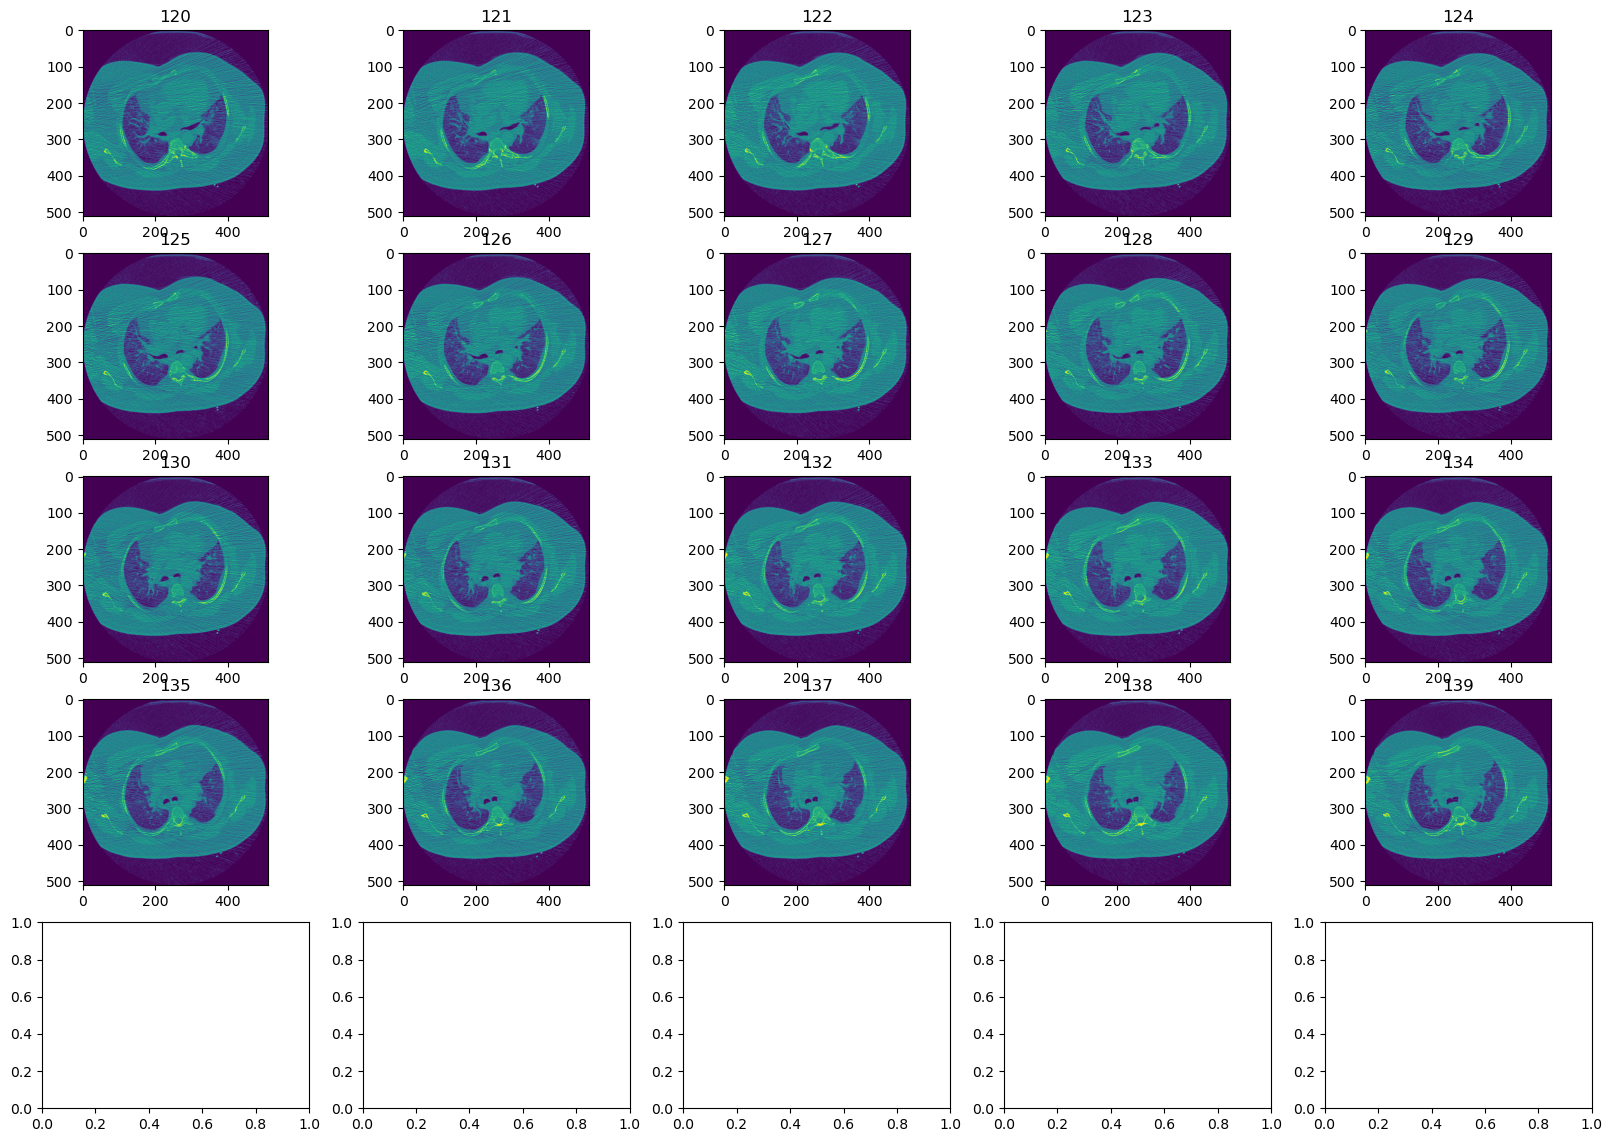

In [11]:
## plot direction {1 0 0 0 1 0 0 0 1}
# test_path = paths[0]
test_uid = uid_2

load = Ct(test_uid)

center_xyz = annotation[annotation["seriesuid"] == uid_2][["coordX", "coordY", "coordZ"]].values.reshape(3,)
origin = load.origin_xyz
vxsize = load.vxSize_xyz
direction_a = load.direction_a

center_irc  = xyz2irc(center_xyz, origin, vxsize, direction_a)
index = list(range(center_irc.index - 10, center_irc.index + 10))

flip_hu = load.hu_a[:, ::-1, ::-1]

plot_ct(flip_hu, list(range(120, 140)))

# print(xyz2irc(center_xyz, origin, vxsize, direction_a))
# print(direction_a)

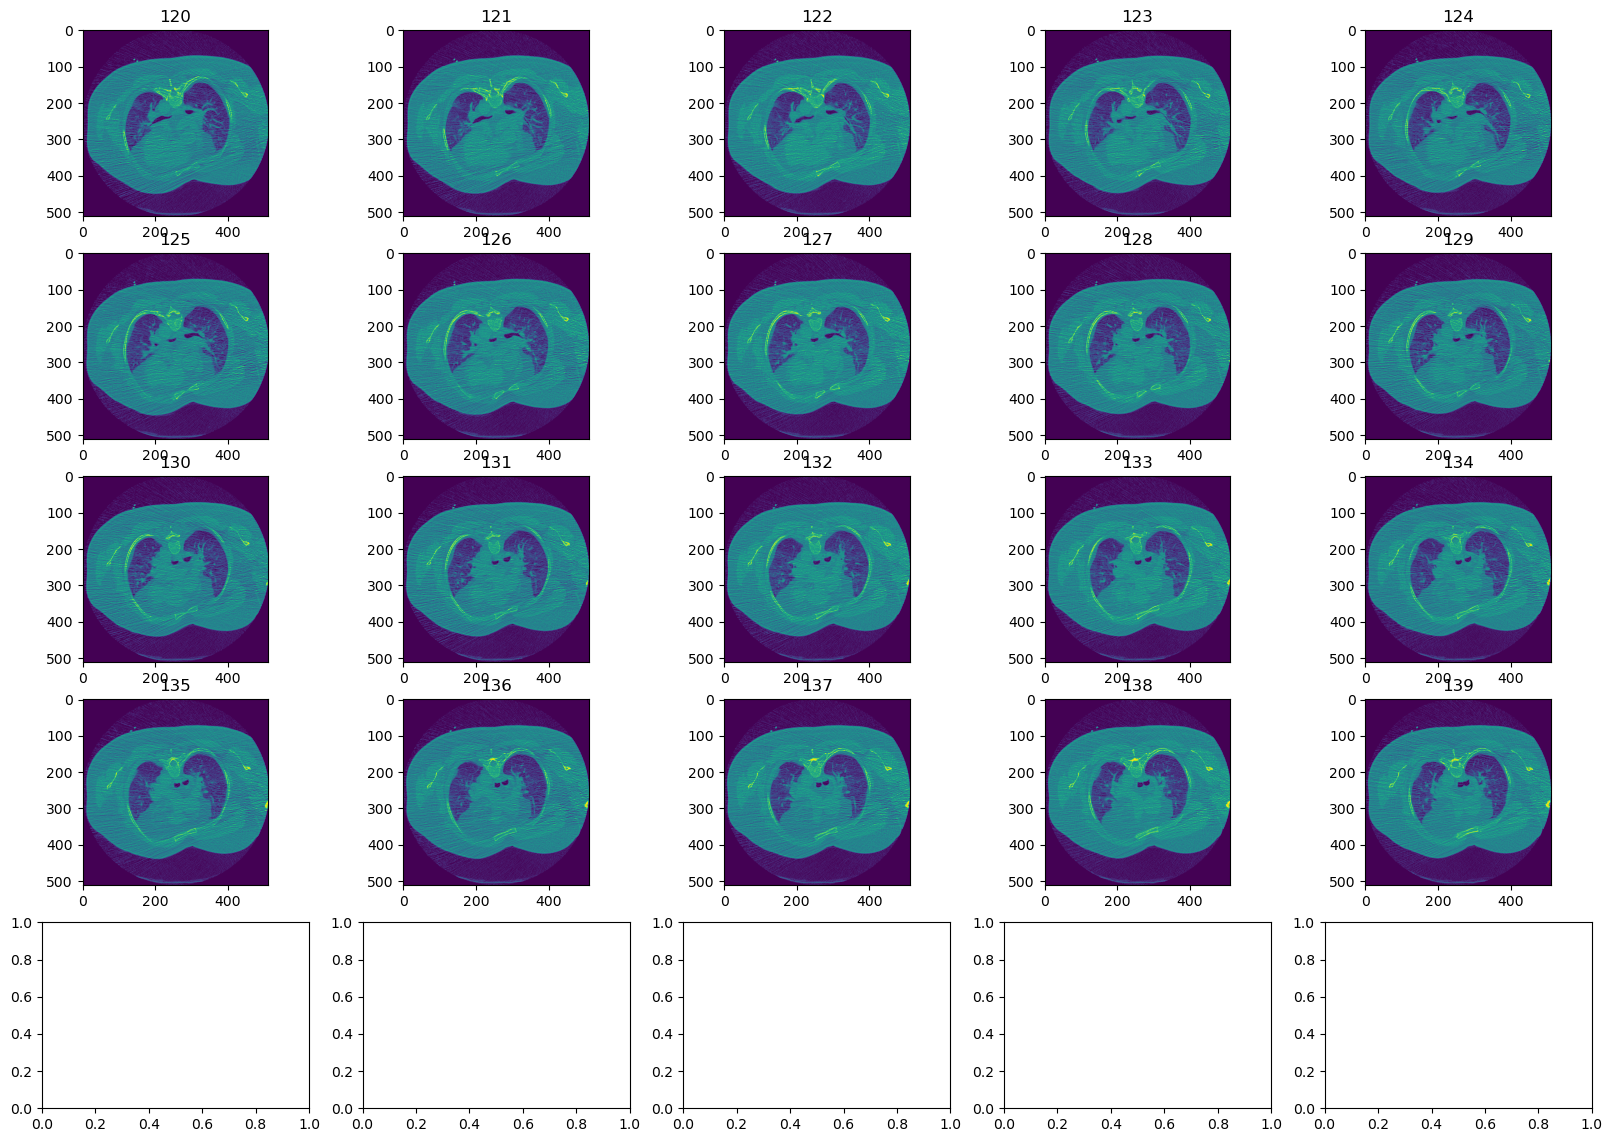

In [12]:
## plot direction {1 0 0 0 1 0 0 0 1}
# test_path = paths[0]
test_uid = uid_2

load = Ct(test_uid)

center_xyz = annotation[annotation["seriesuid"] == uid_2][["coordX", "coordY", "coordZ"]].values.reshape(3,)
origin = load.origin_xyz
vxsize = load.vxSize_xyz
direction_a = load.direction_a

center_irc  = xyz2irc(center_xyz, origin, vxsize, direction_a)
index = list(range(center_irc.index - 10, center_irc.index + 10))

flip_hu = load.hu_a

plot_ct(flip_hu, list(range(120, 140)))

# print(xyz2irc(center_xyz, origin, vxsize, direction_a))
# print(direction_a)

## Khám phá Các ảnh cần flip

In [1]:
from util import read_sitk
import glob
from tqdm import tqdm
import numpy as np

luna_paths = glob.glob("../../luna16/LUNA16/subset*/*.mhd")

In [ ]:
flip_img_paths = []
simple_direction = np.array((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0))

for path in tqdm(luna_paths):
    img, _,_, direction = read_sitk(path)
    direction = np.round(np.array(direction))

    if not np.array_equal(simple_direction, direction):
        flip_img_paths.append((path, img.shape, direction))
        print((img.shape, direction))

# sử dụng np.round vì có những giá trị 0.9999999 (= 1)        

In [6]:
print(len(flip_img_paths))

flip_img_paths[0]

14


('../../luna16/LUNA16\\subset1\\1.3.6.1.4.1.14519.5.2.1.6279.6001.282512043257574309474415322775.mhd',
 (283, 512, 512),
 array([-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  1.]))